<a href="https://colab.research.google.com/github/jcdumlao14/CloudcreditsTechnologies-Data-Science-Internship/blob/main/Project_8_Energy_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 8: Energy Consumption Analysis**

## **📝 Description:**

- *Analyze and predict energy consumption patterns in a building or city. Use time series analysis and regression models to understand the factors affecting energy usage. Visualize energy consumption trends and model predictions.*


## **🔧 Project Structure:**

1. **🧠 Define the Problem:** Understand the objective and type of problem (classification, regression, etc.).
2. **🗂️ Collect and Prepare Data:** Obtain the dataset, handle missing values, and preprocess data.
3. **📊 Exploratory Data Analysis (EDA):** Visualize data to understand patterns and correlations.
4. **📐 Feature Engineering:** Select and create relevant features.
5. **🔀 Split the Data:** Divide the dataset into training and testing sets.
6. **🤖 Choose a Model:** Select a suitable machine learning algorithm.
7. **🏋️ Train the Model:** Train the model using the training set.
8. **📈 Evaluate the Model:** Use appropriate metrics to evaluate the model on the test set.
9. **🔧 Improve the Model:** Tune hyperparameters, try different algorithms, or enhance features.
10. **🚀 Deploy the Model (optional):** Create an application or API to make predictions using the trained model.

##  **🧪 I’ll experiment with:**

- **Random Forest Regressor**
- **Gradient Boosting Regressor**
- **XGBoost Regressor**
- **Linear Regression**
- **Support Vector Regressor (SVR)**
- **GridSearchCV** (for hyperparameter tuning)
- **Lag Features & Rolling Statistics** (for time series feature engineering)
- **SMAPE & R-squared** (for regression evaluation)
- **Correlation Heatmaps** (to analyze feature relationships)
- **Time Series Visualizations:**
  - *Line charts* (e.g., energy consumption over time)
  - *Box plots* (yearly distributions)
  - *Stacked area charts* (energy by source)
- **Scatter plots** (e.g., GDP vs Energy Consumption, Per Capita comparisons)
- **Choropleth Maps** (geographical energy usage visualization using Plotly)
- **Feature Importance Visualization** (from tree-based models)
- **Missing Value Imputation:**
  - *Median for numeric*
  - *Mode for categorical*




## **Data Source: [Kaggle Dataset/World Energy Consumption](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption)**

#  **1. 🧠 Define the Problem**

## **Objective:** Analyze historical energy consumption data to understand trends and predict future energy consumption.

## **Type of Problem:** Regression (predicting a continuous numerical value - energy consumption).

## **Import Libraries**

- **`import pandas as pd`:** Think of pandas as your Excel on steroids. It's used to work with data in a table format (like spreadsheets) called DataFrames. The `as pd` is just a nickname, so you can use pd instead of typing pandas every time.
- **`import numpy as np`:** numpy is for doing math stuff, especially with arrays of numbers. It's used for calculations, data manipulation, and more. `as np` is its nickname.
- **`import matplotlib.pyplot as plt`:** `matplotlib` is for making basic charts and graphs (line plots, scatter plots, bar charts, etc.). pyplot is a part of matplotlib that makes it easy to create these plots. `as plt` is its nickname.
- **`import seaborn as sns`:** seaborn is like a fancier version of matplotlib. It's also for making charts and graphs, but it focuses on statistical visualizations (heatmaps, distributions) and makes them look prettier. `as sns` is its nickname.
- **`from sklearn.model_selection import train_test_split`:** sklearn (scikit-learn) is the main machine learning library. `train_test_split` is a tool for splitting your data into training and testing sets, so you can train your model and then see how well it works on new data.
- **`from sklearn.linear_model import LinearRegression`:** This imports the `LinearRegression` model, which is a simple way to find a line that best fits your data, to predict the numerical value.
- **`from sklearn.metrics import mean_squared_error, r2_score`:** `sklearn.metrics` provides ways to measure how well your model is doing. `mean_squared_error` calculates the average squared difference between your model's predictions and the actual values. `r2_score` tells you how much of the variation in your data your model explains (higher is better).
- **`from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures`:** `sklearn.preprocessing` has tools to prepare your data before you feed it to a model. MinMaxScaler scales your data so that all values are between 0 and 1. `PolynomialFeatures` creates new features by raising existing features to powers (e.g., x, x^2, x^3).
- **`from sklearn.impute import SimpleImputer`:** `SimpleImputer` helps fill in missing values in your data (e.g., replacing them with the mean or median).
- **`from sklearn.pipeline import Pipeline`:** Pipeline lets you chain together multiple steps in your machine learning process (like scaling, feature engineering, and model training) into a single object. This keeps your code organized.
- **`from sklearn.preprocessing import StandardScaler`:** `StandardScaler scales` your data so that it has a mean of 0 and a standard deviation of 1. This can help some models perform better.
- **`from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor`:** `sklearn.ensemble` includes more advanced machine learning models like `RandomForestRegressor` and `GradientBoostingRegressor`, which are often more accurate than simple linear models. These models combine multiple decision trees.
- **`from sklearn.model_selection import GridSearchCV`:** `GridSearchCV` helps you find the best settings (hyperparameters) for your model by trying out different combinations and seeing which one works best.
- **`import warnings`:** This imports the `warnings module`, which is used to manage warning messages that might appear during the execution of the code.
- **`warnings.filterwarnings('ignore')`:** This line tells Python to ignore any warning messages. It's often used to suppress warnings that you know are not important.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


# **2. 🗂️Collect and Prepare Data**

## **Unzip Data:**
- It finds a zipped data file, unzips it into a folder.

In [ ]:
import zipfile
import os # accessing directory structure

# Path to the zip file
zip_path = '/content/World Energy Consumption.csv (1).zip'

# Destination directory to extract to
extract_path = '/content/unzipped_folder'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Now list the files inside the extracted folder
print(os.listdir(extract_path))

['World Energy Consumption.csv']


## **📥 Read the CSV Files**

## Load Data
- The code reads the data from the CSV file, specifically "World Energy Consumption.csv," into a table-like structure called a DataFrame using pandas.

In [ ]:
# Load Data
data_path = '/content/unzipped_folder'

# Read the CSV files
energy_consumption_df = pd.read_csv(f'{data_path}/World Energy Consumption.csv')

- Initial Look: It shows the shape (rows and columns), the first few lines of the data, the type of data in each column (number, text etc), and the summary of each data such as average, std, and also shows any missing values in the dataset.


In [ ]:
print(f"Shape of dataframe: {energy_consumption_df.shape}")
energy_consumption_df.head().style.background_gradient(cmap='gist_rainbow')

Shape of dataframe: (22012, 129)


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,nan,nan,nan,nan,nan,nan,nan,nan,5.600000,1.519000,nan,500.231000,nan,nan,nan,nan,nan,71.030000,nan,nan,nan,nan,19.268000,nan,368.650000,368.650000,nan,nan,nan,nan,nan,nan,nan,nan,295.750000,nan,nan,80.225000,nan,nan,nan,nan,nan,163.220000,nan,nan,nan,nan,nan,44.275000,nan,184.410000,nan,nan,nan,nan,50.370000,nan,13.663000,nan,nan,nan,nan,nan,72.900000,nan,19.775000,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,0.000000,nan,nan,nan,nan,nan,61.500000,nan,nan,nan,nan,nan,16.682000,nan,nan,22.530000,16.930000,nan,nan,nan,nan,nan,6.111000,4.592000,nan,nan,nan,nan,nan,nan,nan,72.900000,nan,19.775000,nan,nan,nan,nan,nan,0.000000,nan,0.000000,nan,nan,nan,nan,nan,0.000000,nan,0.000000,nan
1,ASEAN (Ember),2001,nan,nan,nan,nan,nan,nan,nan,nan,6.020000,1.516000,nan,499.358000,nan,nan,nan,nan,nan,80.020000,nan,nan,nan,nan,20.147000,nan,397.190000,397.190000,nan,nan,nan,nan,nan,nan,nan,nan,320.510000,nan,nan,80.694000,nan,nan,nan,nan,nan,185.350000,nan,nan,nan,nan,nan,46.665000,nan,198.340000,nan,nan,nan,nan,54.260000,nan,13.661000,nan,nan,nan,nan,nan,76.680000,nan,19.306000,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,0.000000,nan,nan,nan,nan,nan,55.140000,nan,nan,nan,nan,nan,13.883000,nan,nan,22.

In [ ]:
print("\nData types of each column:")
energy_consumption_df.dtypes


Data types of each column:


,0
country,object
year,int64
iso_code,object
population,float64
gdp,float64
...,...
wind_elec_per_capita,float64
wind_electricity,float64
wind_energy_per_capita,float64
wind_share_elec,float64


In [ ]:
print("\nSummary statistics of numerical columns:")
energy_consumption_df.describe().style.background_gradient(cmap='tab20c')


Summary statistics of numerical columns:


,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,22012.000000,18123.000000,11113.000000,1747.000000,2687.000000,2302.000000,2767.000000,5275.000000,5527.000000,5492.000000,2671.000000,5165.000000,5258.000000,5315.000000,4666.000000,5420.000000,5850.000000,6444.000000,9657.000000,16239.000000,14718.000000,16494.000000,6409.000000,4787.000000,5656.000000,7191.000000,3899.000000,12117.000000,12310.000000,10602.000000,7211.000000,4974.000000,4857.000000,5956.000000,6550.000000,4215.000000,4962.000000,6409.000000,4787.000000,5086.000000,5111.000000,5215.000000,5850.000000,6444.000000,4468.000000,7807.000000,16516.000000,14896.000000,16771.000000,6409.000000,4787.000000,5306.000000,5082.000000,5374.000000,5479.000000,7878.000000,8884.000000,4725.000000,7010.000000,4787.000000,5165.000000,5374.000000,5479.000000,7909.000000,8888.000000,4725.000000,7040.000000,4787.000000,5381.000000,5241.000000,2467.000000,4273.000000,4397.000000,7647.000000,8516.000000,3780.000000,6773.000000,3836.000000,5645.000000,5609.000000,5713.000000,5850.000000,6444.000000,4959.000000,9838.000000,17148.000000,15369.000000,17405.000000,6409.000000,4787.000000,4978.000000,8164.000000,5493.000000,3549.000000,4873.000000,7227.000000,5241.000000,4293.000000,6920.000000,5352.000000,4308.000000

In [ ]:
print("\nNumber of missing values in each column:")
energy_consumption_df.isnull().sum().sort_values(ascending=False)


Number of missing values in each column:


,0
biofuel_cons_change_pct,20265
solar_cons_change_pct,19888
biofuel_cons_per_capita,19710
wind_cons_change_pct,19599
nuclear_cons_change_pct,19545
...,...
oil_prod_change_twh,4864
oil_production,4607
population,3889
country,0


## **🧹Data Cleaning and Preprocessing**

- Handle Missing Data: The code identifies columns with missing values. It fills those gaps: Numerical columns are filled using the median value, and columns containing text are filled using the most frequent value (the value that appears most often).
- Data Type Correction: The code converts year column to the correct integer type.

In [ ]:
# 1. Handle Missing Values
# Impute missing numerical values with the median and 'country' and 'iso_code' with mode
numerical_cols = energy_consumption_df.select_dtypes(include=np.number).columns
categorical_cols = energy_consumption_df.select_dtypes(exclude=np.number).columns

imputer_numerical = SimpleImputer(strategy='median')
energy_consumption_df[numerical_cols] = imputer_numerical.fit_transform(energy_consumption_df[numerical_cols])

imputer_categorical = SimpleImputer(strategy='most_frequent')
energy_consumption_df[categorical_cols] = imputer_categorical.fit_transform(energy_consumption_df[categorical_cols])

print("\nMissing values after imputation:")
print(energy_consumption_df.isnull().sum().sort_values(ascending=False).head())  # Display top 5 columns with missing values

# 2. Data Type Conversion (if needed)
# Check if any columns need to be converted to appropriate data types (e.g., date columns)
# Example: If 'year' column is not an integer, convert it:
energy_consumption_df['year'] = energy_consumption_df['year'].astype(int)


Missing values after imputation:
country       0
year          0
iso_code      0
population    0
gdp           0
dtype: int64


# **3. 📊 Exploratory Data Analysis (EDA)**

## **3.1. Global Energy Consumption Over Time**
- Line graph showing the total energy used each year. Also prints average energy consumption.

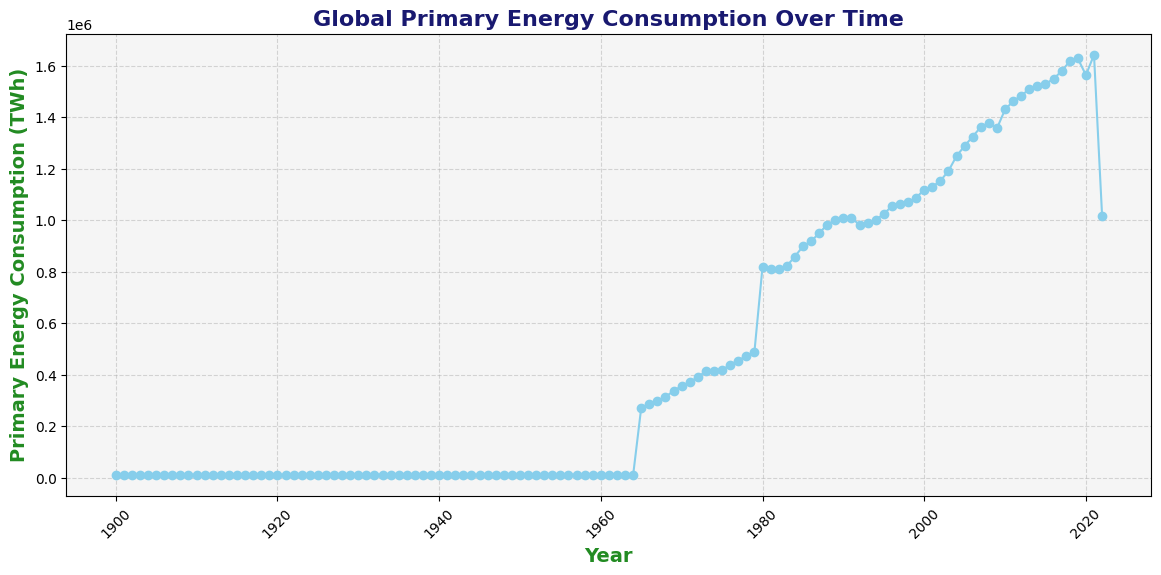

Mean Primary Energy Consumption: 2621.96 TWh


In [ ]:
# Energy Consumption Over Time (Line Plot)
plt.figure(figsize=(14, 6))
plt.plot(energy_consumption_df.groupby('year')['primary_energy_consumption'].sum(), marker='o', linestyle='-', color='skyblue')
plt.title('Global Primary Energy Consumption Over Time', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Primary Energy Consumption (TWh)', fontsize=14, fontweight='bold', color='forestgreen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.gca().set_facecolor('whitesmoke')
plt.show()

# Print value: Mean energy consumption
mean_consumption = energy_consumption_df['primary_energy_consumption'].mean()
print(f"Mean Primary Energy Consumption: {mean_consumption:.2f} TWh")


## **3.2. Top Energy Consuming Countries**
- Bar chart showing the top 10 countries using the most energy. Also prints the country that uses the most energy.

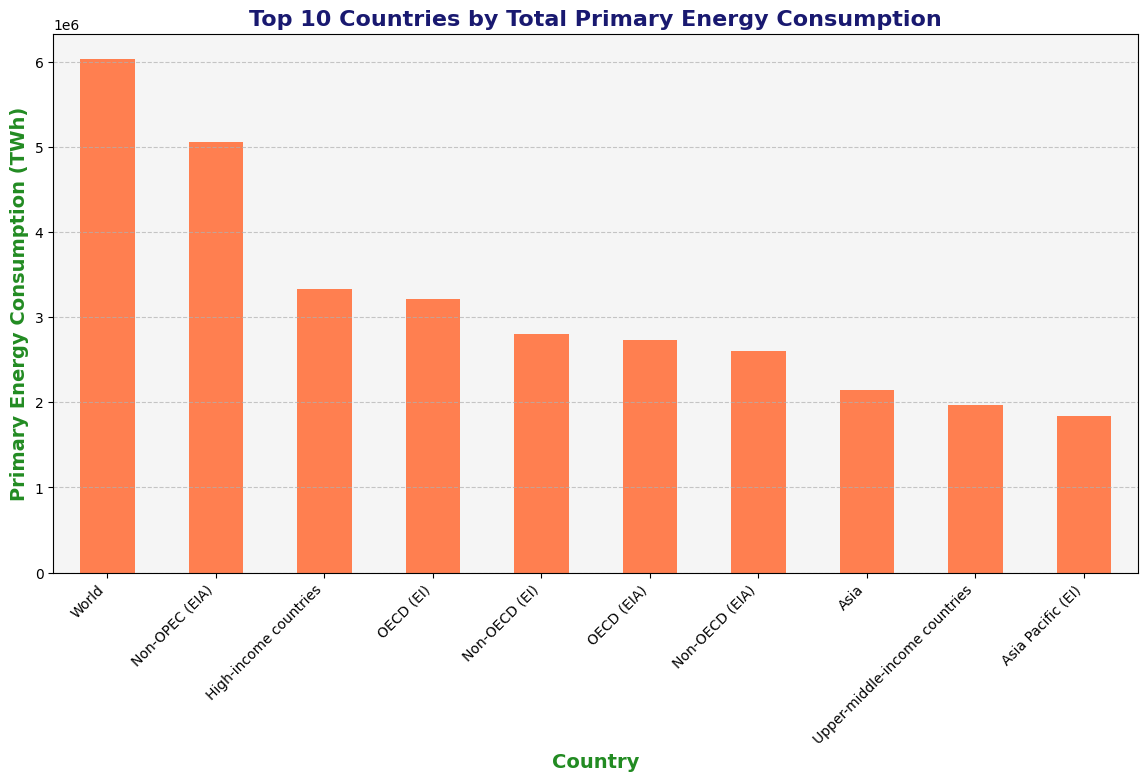

Country with Highest Total Energy Consumption: World


In [ ]:
# Energy Consumption by Country (Bar Chart)
top_countries = energy_consumption_df.groupby('country')['primary_energy_consumption'].sum().nlargest(10)
plt.figure(figsize=(14, 7))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Total Primary Energy Consumption', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('Country', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Primary Energy Consumption (TWh)', fontsize=14, fontweight='bold', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.show()

# Print value: Country with highest consumption
highest_consuming_country = top_countries.index[0]
print(f"Country with Highest Total Energy Consumption: {highest_consuming_country}")

## **3.3. Distribution of Energy Consumption**
- Histogram displaying how the values are distributed. Also prints the median energy consumption.

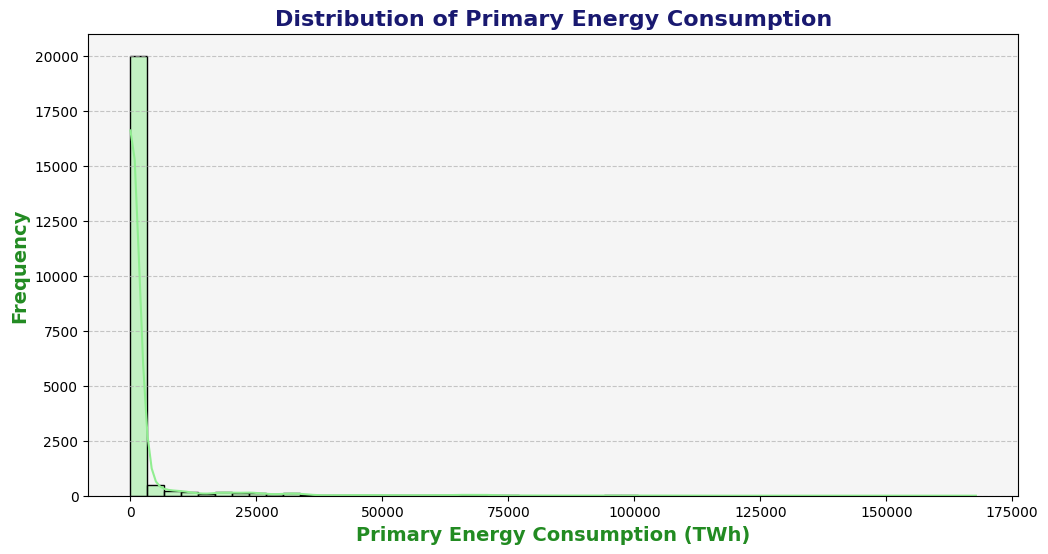

Median Primary Energy Consumption: 98.92 TWh


In [ ]:
# Distribution of Energy Consumption (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(energy_consumption_df['primary_energy_consumption'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Primary Energy Consumption', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('Primary Energy Consumption (TWh)', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='forestgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.show()

# Print value: Median consumption
median_consumption = energy_consumption_df['primary_energy_consumption'].median()
print(f"Median Primary Energy Consumption: {median_consumption:.2f} TWh")

## **3.4. Correlation Matrix**
- Heatmap visualizing relationships between numerical columns. Also prints the strongest positive correlation among the data.

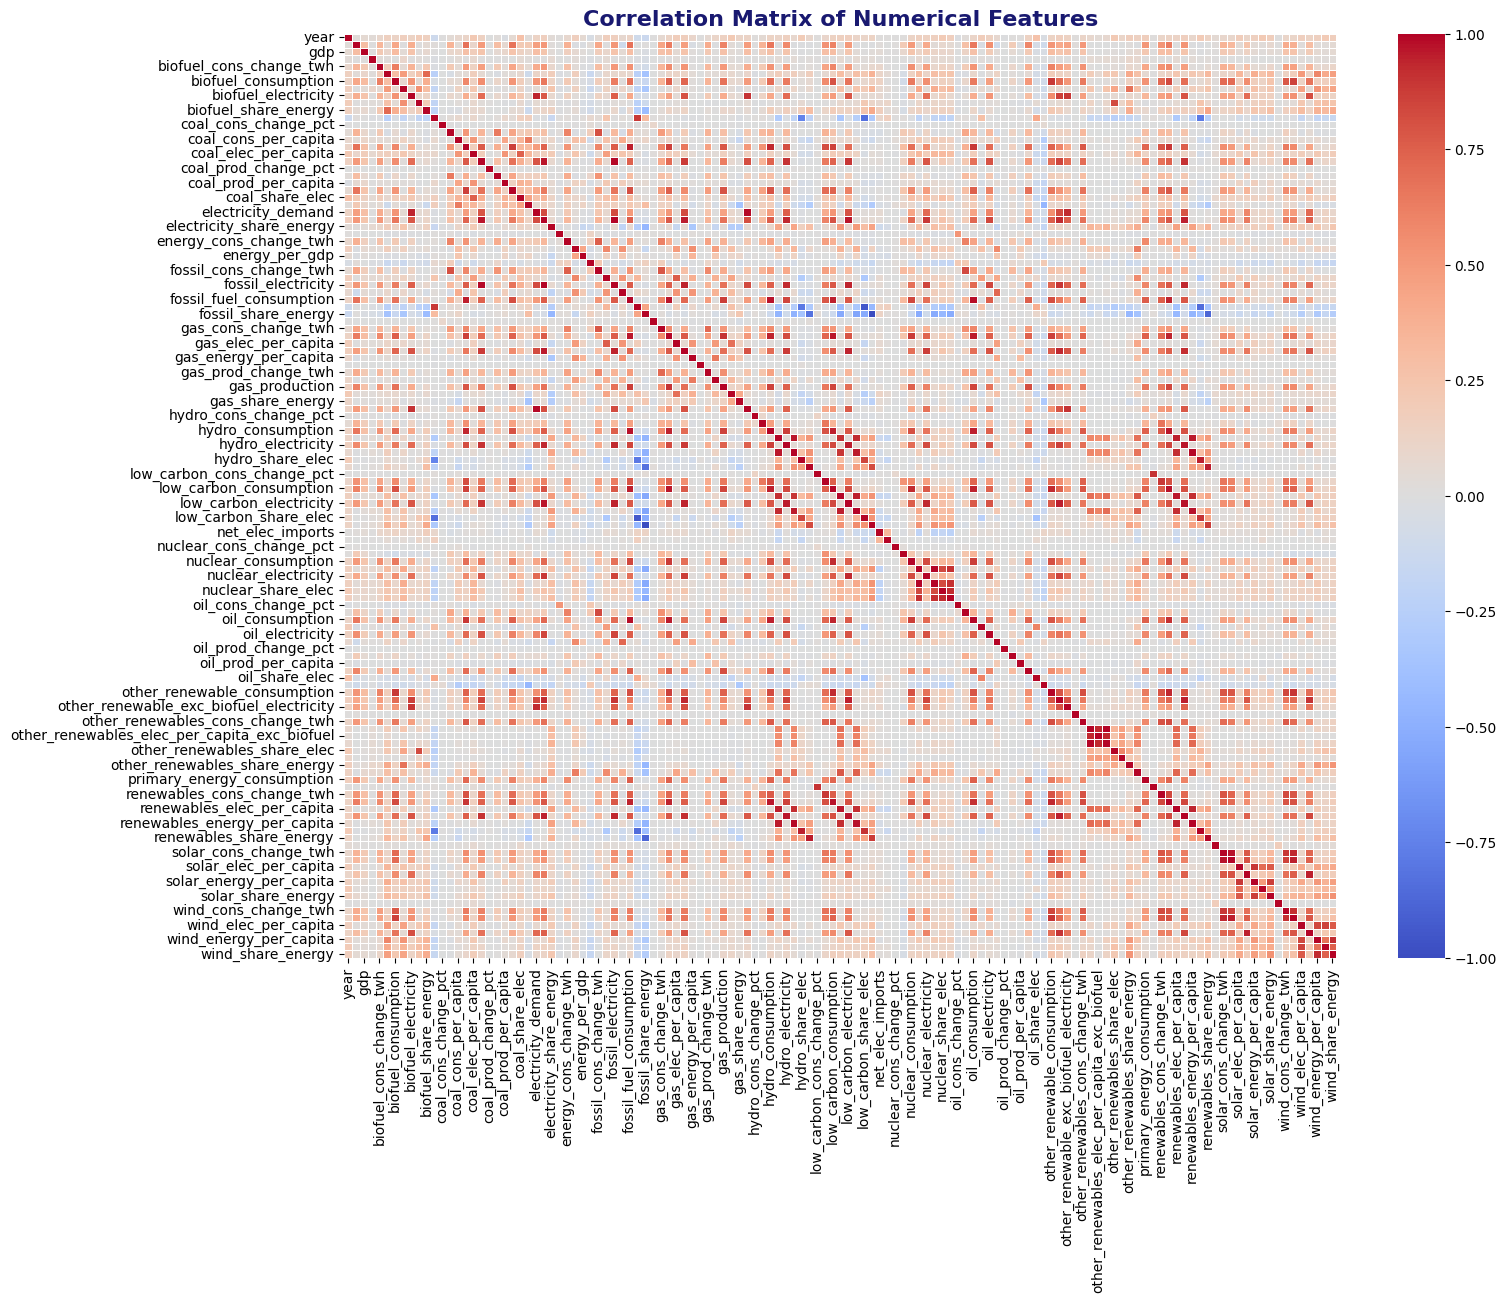

Strongest Positive Correlation:
nuclear_elec_per_capita  nuclear_energy_per_capita    0.998314
dtype: float64


In [ ]:
# Correlation Heatmap
numerical_df = energy_consumption_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', color='midnightblue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Print value: Strongest positive correlation
corr_values = correlation_matrix.unstack()
corr_pairs = corr_values.sort_values(kind="quicksort")
strongest_positive_corr = corr_pairs[corr_pairs < 1].nlargest(1)
print("Strongest Positive Correlation:")
print(strongest_positive_corr)

## **3.5. Energy Consumption vs. GDP**
- Scatter plot of each country's energy usage compared to its GDP (Gross Domestic Product). Also prints the correlation between gdp and energy consumption.

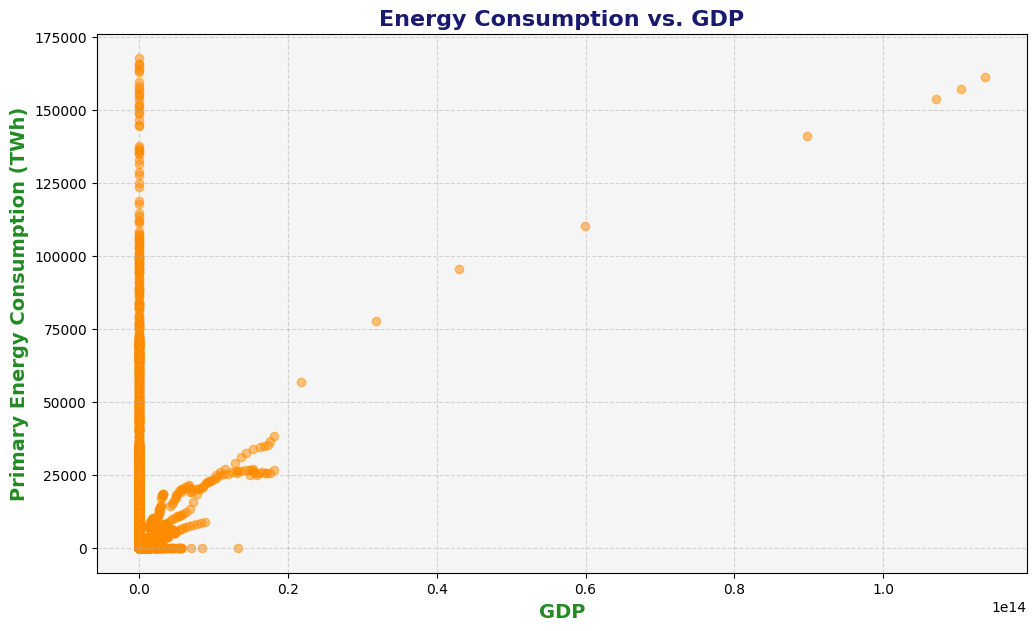

Correlation Coefficient between GDP and Energy Consumption: 0.22


In [ ]:
# Energy Consumption vs. GDP (Scatter Plot)
plt.figure(figsize=(12, 7))
plt.scatter(energy_consumption_df['gdp'], energy_consumption_df['primary_energy_consumption'], alpha=0.5, color='darkorange')
plt.title('Energy Consumption vs. GDP', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('GDP', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Primary Energy Consumption (TWh)', fontsize=14, fontweight='bold', color='forestgreen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_facecolor('whitesmoke')
plt.show()

# Print value: Correlation coefficient
correlation = energy_consumption_df['gdp'].corr(energy_consumption_df['primary_energy_consumption'])
print(f"Correlation Coefficient between GDP and Energy Consumption: {correlation:.2f}")


## **3.6. Energy Consumption Over the Years**
- Visualize the distribution for each year. Also prints the median energy consumption for a specific year.

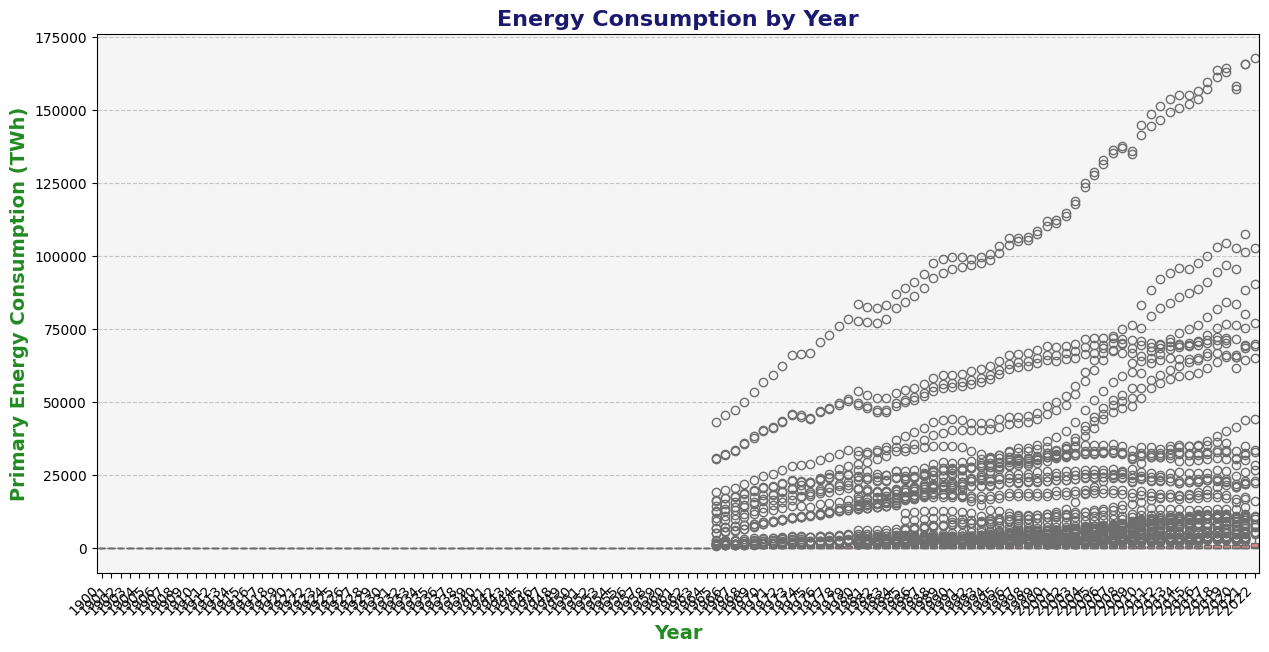

Median Primary Energy Consumption in 2010: 98.92 TWh


In [ ]:
# Boxplot of Energy Consumption by Year
plt.figure(figsize=(15, 7))
sns.boxplot(x='year', y='primary_energy_consumption', data=energy_consumption_df, color='lightcoral')
plt.title('Energy Consumption by Year', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Primary Energy Consumption (TWh)', fontsize=14, fontweight='bold', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.show()

# Print value: Median energy consumption for a specific year
year_to_check = 2010
median_consumption_year = energy_consumption_df[energy_consumption_df['year'] == year_to_check]['primary_energy_consumption'].median()
print(f"Median Primary Energy Consumption in {year_to_check}: {median_consumption_year:.2f} TWh")


## **3.7. Energy Consumption by Source**
- Stacked area chart of the different source of energy consumption such as coal, gas, oil etc. Also prints the total consumption for a specific source.

<Figure size 1600x800 with 0 Axes>

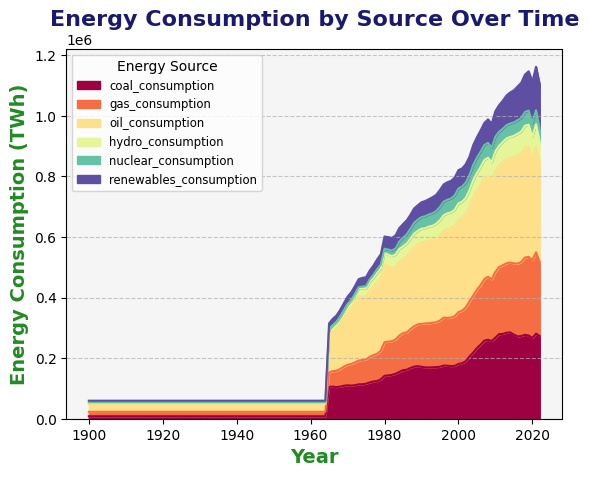

Total coal_consumption Consumption: 11344917.84 TWh


In [ ]:
# Comparison of Energy Sources (Stacked Bar Chart)
energy_source_cols = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'hydro_consumption', 'nuclear_consumption', 'renewables_consumption']
energy_source_data = energy_consumption_df.groupby('year')[energy_source_cols].sum()

plt.figure(figsize=(16, 8))
energy_source_data.plot(kind='area', stacked=True, colormap='Spectral')
plt.title('Energy Consumption by Source Over Time', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Energy Consumption (TWh)', fontsize=14, fontweight='bold', color='forestgreen')
plt.legend(title='Energy Source', fontsize='small')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.show()

# Print value: Total consumption for a specific source
source_to_check = 'coal_consumption'
total_source_consumption = energy_consumption_df[source_to_check].sum()
print(f"Total {source_to_check} Consumption: {total_source_consumption:.2f} TWh")

## **3.8. Renewable Energy Share**
- Line graph showing the average percentage of energy from renewable sources each year. Also prints the average renewable energy share.

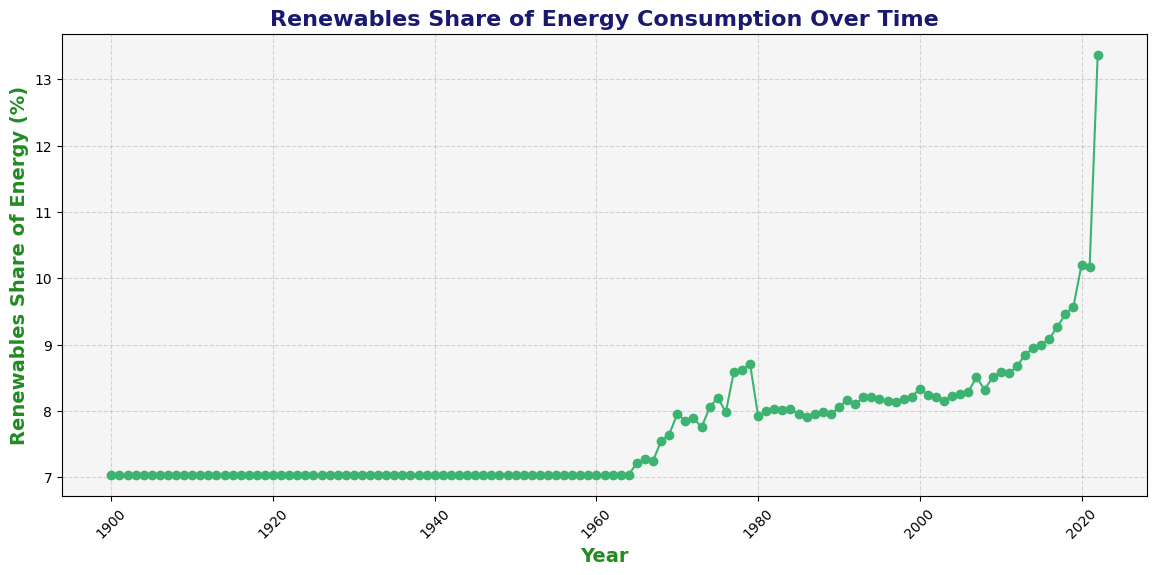

Mean Renewables Share of Energy: 7.94%


In [ ]:
# Renewables Share of Energy Consumption Over Time
plt.figure(figsize=(14, 6))
plt.plot(energy_consumption_df.groupby('year')['renewables_share_energy'].mean(), marker='o', linestyle='-', color='mediumseagreen')
plt.title('Renewables Share of Energy Consumption Over Time', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Renewables Share of Energy (%)', fontsize=14, fontweight='bold', color='forestgreen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.gca().set_facecolor('whitesmoke')
plt.show()

# Print value: Mean renewables share
mean_renewables_share = energy_consumption_df['renewables_share_energy'].mean()
print(f"Mean Renewables Share of Energy: {mean_renewables_share:.2f}%")

## **3.9.Energy Per Capita vs. GDP Per Capita**
- Scatter plot showing each country's energy use per person compared to its GDP per person. Also prints the correlation between them.

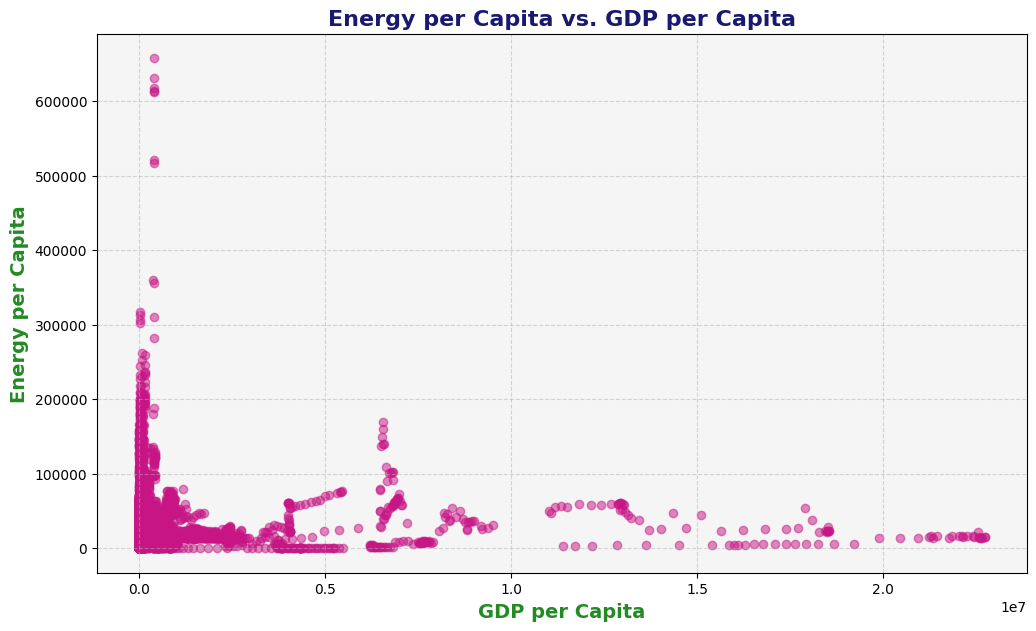

Correlation Coefficient between GDP per Capita and Energy per Capita: 0.04


In [ ]:
# 9.  GDP vs. Energy per Capita (Scatter Plot)
plt.figure(figsize=(12, 7))
plt.scatter(energy_consumption_df['gdp'] / energy_consumption_df['population'], energy_consumption_df['energy_per_capita'], alpha=0.5, color='mediumvioletred')
plt.title('Energy per Capita vs. GDP per Capita', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('GDP per Capita', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Energy per Capita', fontsize=14, fontweight='bold', color='forestgreen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_facecolor('whitesmoke')
plt.show()

# Print value: Correlation coefficient
correlation = (energy_consumption_df['gdp'] / energy_consumption_df['population']).corr(energy_consumption_df['energy_per_capita'])
print(f"Correlation Coefficient between GDP per Capita and Energy per Capita: {correlation:.2f}")


## **3.10. Geographical Visualization**
- Choropleth map illustrating energy consumption by country over time using Plotly.

In [ ]:
# Geographic Visualization
import plotly.express as px

# Aggregate energy consumption by country and year
country_energy = energy_consumption_df.groupby(['year', 'country'])['primary_energy_consumption'].sum().reset_index()

# Create a choropleth map
fig = px.choropleth(country_energy,
                    locations="country",
                    locationmode='country names',
                    color="primary_energy_consumption",
                    hover_name="country",
                    animation_frame="year",
                    title='World Energy Consumption Over Time',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title_x=0.5)  # Center the title
fig.show()

# **4. 📐 Feature Engineering**
- **Create GDP Per Capita:** Creating a new feature, which is a result of dividing GDP by Population.
- **Select Features:** The code defines a list of columns (features) that will be used to predict energy consumption (the target).
- **Data Preparation:** Assign the features and target from the dataset into X and y respectively for model training.

In [ ]:
# Feature Engineering
# Select relevant features for the model
features = ['year', 'population', 'gdp', 'energy_per_capita', 'renewables_share_energy', 'fossil_fuel_consumption']  # Add more relevant features
target = 'primary_energy_consumption'

# Create a new feature: GDP per capita
energy_consumption_df['gdp_per_capita'] = energy_consumption_df['gdp'] / energy_consumption_df['population']
features.append('gdp_per_capita')

# Select features and target, handling missing values
X = energy_consumption_df[features]
y = energy_consumption_df[target]


# **5. 🔀 Split the Data**
- The data is split into two sets: a training set (80%) to train the model and a testing set (20%) to see how well the model performs on unseen data.

In [ ]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **6. 🤖 Choose a Model**
- A Random Forest Regressor model is selected for predicting energy consumption.

In [ ]:
model = RandomForestRegressor(random_state=42)

- Hyperparameter Tuning: `GridSearchCV` is used to find the best combination of settings (hyperparameters) for the model by trying out different combinations and evaluating their performance using cross-validation.

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)


# **7. 🏋️ Train the Model**
- (Random Forest Regressor) using the training data to learn the relationships between the features and the target.

In [ ]:
# Train the Model
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score (Negative MSE): -46250797.285158746


In [ ]:
# Get best estimator
best_model = grid_search.best_estimator_

# **8. 📈 Evaluate the Model**

- **Make Predictions:** The trained model is used to predict energy consumption on the testing set.
- **Assess Performance:** The code calculates how well the model did by comparing the predictions to the actual values using metrics like Mean Squared Error (MSE) and R-squared. Lower MSE and higher R-squared indicate better performance. Also, the feature importances are plotted.
- **Prediction vs Actual:** Visualize the predicted value against the actual value using a scatterplot.

In [ ]:
# Evaluate the Model
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 53825335.38
R-squared: 0.59


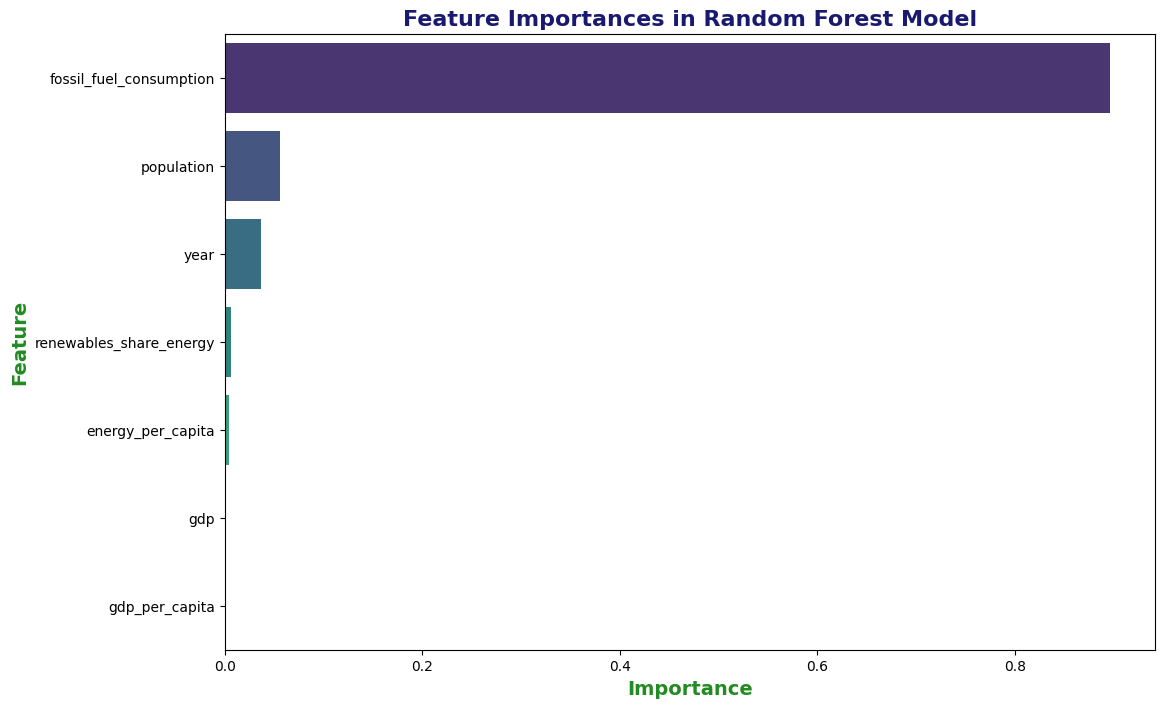

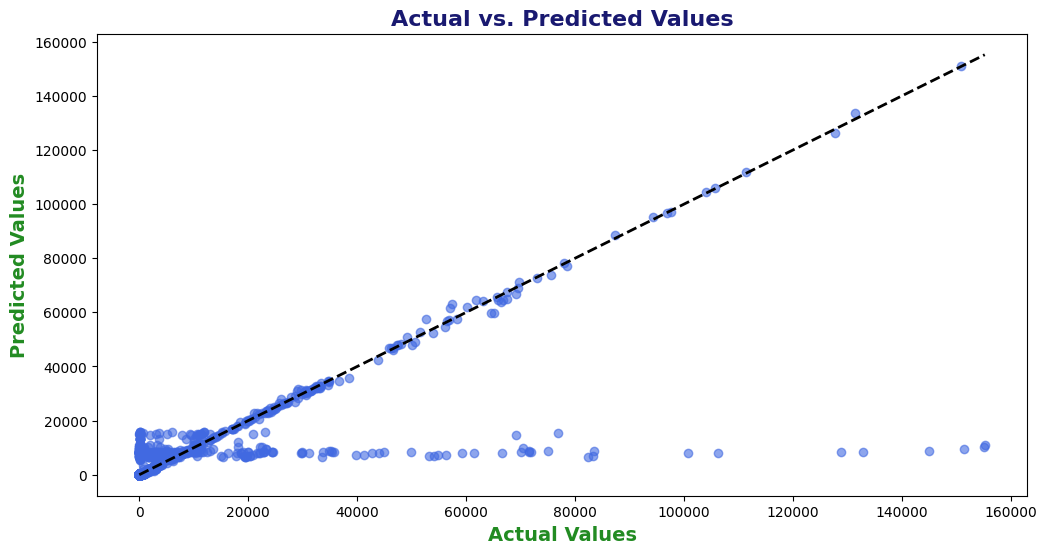

In [ ]:
# Feature Importance Visualization
feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances in Random Forest Model', fontsize=16, fontweight='bold', color='midnightblue')
plt.xlabel('Importance', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Feature', fontsize=14, fontweight='bold', color='forestgreen')
plt.show()

# Prediction vs Actual Visualization
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.xlabel('Actual Values', fontsize=14, fontweight='bold', color='forestgreen')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold', color='forestgreen')
plt.title('Actual vs. Predicted Values', fontsize=16, fontweight='bold', color='midnightblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# **9. 🔧 Improve the Model**

## 🔍 See Detailed Implementation in: *Improved Energy Consumption Prediction  Notebook*

# **10. 🚀 Deploy the Model (optional)**

- Deployment depends on the specific application.  Examples include:
  - Creating an API using Flask or FastAPI
  - Building a web application using Streamlit or Django
  - Integrating the model into a data pipeline


